In [1]:
from keras.datasets import fashion_mnist, mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras
import keras.backend as tf
import numpy as np

Using TensorFlow backend.


In [ ]:
%pylab inline

In [2]:
batch_size = 256
num_classes = 10
epochs = 10

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows = 28
img_cols = 28

if tf.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('data train shape: {0}, label train shape: {1}'.format(x_train.shape, y_train.shape))
print('data test shape: {0}, label test shape: {1}'.format(x_test.shape, y_test.shape))

data train shape: (60000, 28, 28, 1), label train shape: (60000,)
data test shape: (10000, 28, 28, 1), label test shape: (10000,)


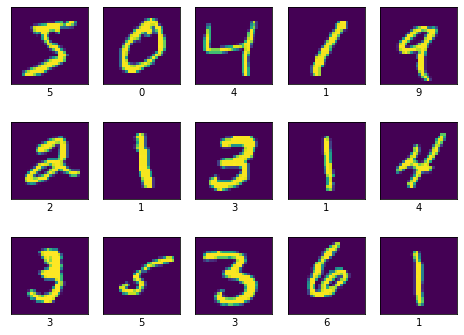

In [4]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_xlabel(y_train[i])
    ax.imshow(x_train[i,:,:,0])

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [6]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                147520    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [9]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3)

score = model.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 98us/step - loss: 0.6121 - accuracy: 0.8055 - val_loss: 0.1297 - val_accuracy: 0.9621
Epoch 2/10
42000/42000 [==============================] - 3s 68us/step - loss: 0.2020 - accuracy: 0.9412 - val_loss: 0.0870 - val_accuracy: 0.9739
Epoch 3/10
42000/42000 [==============================] - 3s 69us/step - loss: 0.1478 - accuracy: 0.9562 - val_loss: 0.0732 - val_accuracy: 0.9780
Epoch 4/10
42000/42000 [==============================] - 3s 68us/step - loss: 0.1271 - accuracy: 0.9621 - val_loss: 0.0610 - val_accuracy: 0.9811
Epoch 5/10
42000/42000 [==============================] - 3s 68us/step - loss: 0.1084 - accuracy: 0.9677 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 6/10
42000/42000 [==============================] - 3s 68us/step - loss: 0.0967 - accuracy: 0.9723 - val_loss: 0.0582 - val_accuracy: 0.9833
Epoch 7/10
42000/42000 [==============================] - 3s 68us/st

In [11]:
def plot_history(history):
    pylab.plot(history.history['accuracy'])
    pylab.plot(history.history['val_accuracy'])
    pylab.title('model accuracy')
    pylab.ylabel('accuracy')
    pylab.xlabel('epoch')
    pylab.legend(['train', 'val'], loc='upper left')
    pylab.show()

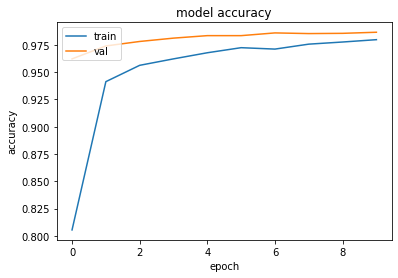

10000/10000 [==============================] - 1s 84us/step


Test loss: 0.03364310650230545
Test accuracy: 0.9889000058174133


In [12]:
plot_history(history)

score = model.evaluate(x_test, y_test, verbose=1)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

In [13]:
model_file = 'simple_model_mnist.h5'
model.save(model_file)

saved_model = keras.models.load_model(model_file)
pred_class = saved_model.predict_classes(x_test[0].reshape(-1, 28, 28, 1))
print(pred_class)

[7]
